# 0. Ready to go?

## 1. 우분투는 처음이신가요?

프로그래밍을 하기 전에 무조건! 해야 할 것이 있다. 바로 개발 환경구성이다.
우리는 인공지능을 공부할 것이기 때문에 인공지능에 맞는 개발 환경을 만들어야 한다.

이번 편에서는 인공지능 개발을 위해 그에 맞는 환경을 구축해보도록 하겠다.

인공지능 연구개발을 위해 주로 사용하는 운영체제는 바로 우분투(Ubuntu)이다. 우분투는 리눅스(Linux) 배포판의 한 종류인데, 구글을 위시한 수많은 회사에서 표준 배포환경으로 사용하고 있고 많은 개발자들이 애용하고 있어서 앞으로 사용하게 될 텐서플로우(Tensorflow) 등 머신러닝 라이브러리들이 가장 안정적으로 구동되는 환경이기도 하다. 물론 리눅스이기 때문에 공짜라는 장점도 있다.

익숙한 윈도우즈(Windows) 환경을 사용하면 안될까? 전혀 안되는 건 아니지만, 학습 도중에 사용하게 될 수많은 라이브러리 중에는 윈도우즈에서 안정적으로 구동되지 않는 경우들이 있다. 기본적으로 윈도우즈는 개발자들이 선호하는 표준 개발환경은 아닌지라, 라이브러리들의 호환성이 충분히 지원되지 않는 경우들이 있기 때문이다.

내용들은 우분투 18.04.05 버전을 기준으로 테스트되었다,

### 한글 사용하기
---
영문판 우분투만 설치된 초기 상태의 실습장비를 가지고 있다면, 아래를 참고해서 한글을 사용할 수 있도록 환경설정을 진행해야 한다.

* `한/영` 버튼을 눌러봤을 때 한국어/영어 입력기 변환이 정상적으로 된다면 넘어가도 괜찮다.

(참고) [Ubuntu LTS 한글 설치 방법](https://gabii.tistory.com/entry/Ubuntu-1804-LTS-%ED%95%9C%EA%B8%80-%EC%84%A4%EC%B9%98-%EB%B0%8F-%EC%84%A4%EC%A0%95)

위글에서 설명하는 순서는 대략 다음과 같다.

> 1. `Language Support`에서 한국어 추가 (이후 시스템 리부팅)
2. 터미널에서 `ibus-setup` 실행 (터미널은 단축키는 `Ctrl`+`Alt`+`R`이다. )
3. `Setting`→`Region & Language`에서 Korean(Hangul) 추가 (이후 다시 시스템 리부팅) 
4. `Setting`→`Region & Language`에 추가된 Korean(Hangul) 옵션설정에서 한영 변환키 (`Hangul` or `Alt`+`R`)

### 만약 한/영 키로 한영 변환이 되지 않는다면?
---
사용하는 컴퓨터 기종에 따라서 위의 4)와 같은 방법으로 `한/영` 키를 통한 한영 변환이 정상적으로 되지 않기도 한다.
이 경우에는 아래를 참고해서 조금 까다로운 자판 배열 세팅 변경을 해주면 된다.

참고 [우분투 리눅스에서 한영키 사용하기](https://kyubot.tistory.com/116)

위 글에서 소개하는 것처럼 `/usr/share/X11/xkb/keycodes/evdev` 파일을 수정해서 `108`번 키코드 값을 로 바꿔주고 나서 리부팅하면 이후 한/영 키코드가 오동작하는 것을 바로잡을 수 있을 것이다.

## 2. 환경구성은 다 되셨나요?
### 터미널을 열고
---
우분투를 사용하고 있다면 `Ctrl`+`Alt`+`T`를 눌러 터미널을 실행해보자.
<br><br>
<center>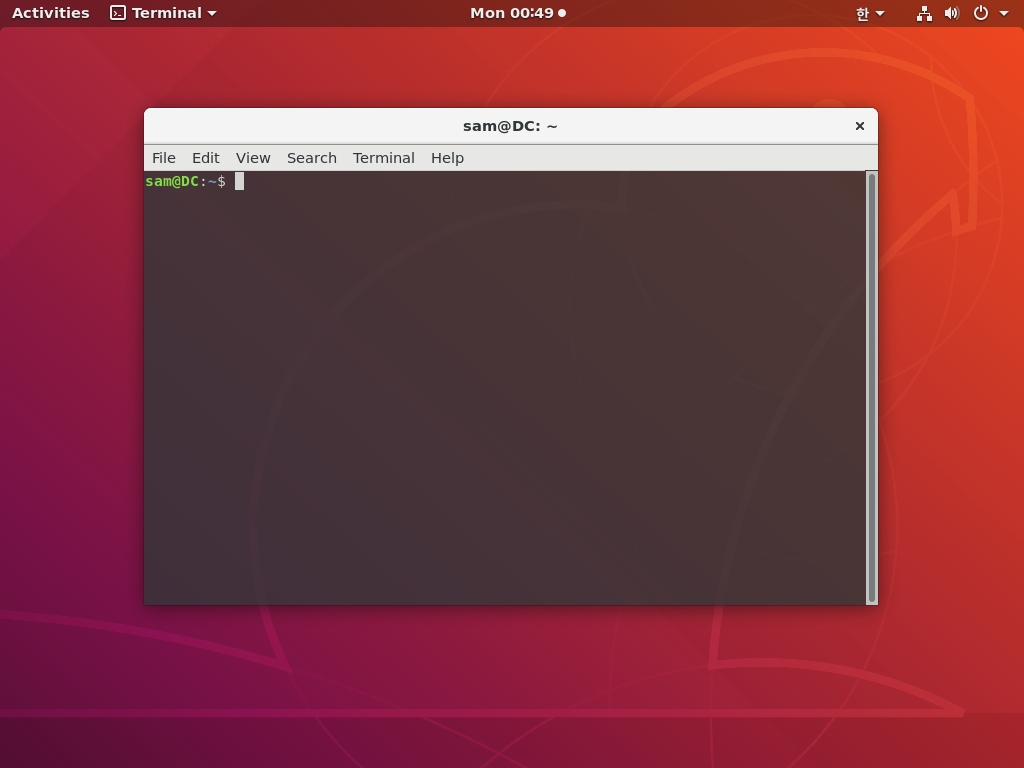</center><center>↑터미널 실행하면 위 그림같은 창이 뜬다.</center>

<br>터미널을 처음 실행시키면 라인 가장 왼쪽에 초록 글자가 뜰 것이다. 아직 `Anaconda`를 설치 하지 않았다는 뜻이다.</br>

가상환경을 활용하기 위해서는 `Anaconda`라는 파이썬 배포판이 필요하다. 

아래 코드를 터미널에 붙여넣어 `Anaconda`를 설치해보자.

```
$ cd ~/Downloads && wget https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh && bash Anaconda3-2020.02-Linux-x86_64.sh && exit
```

<center>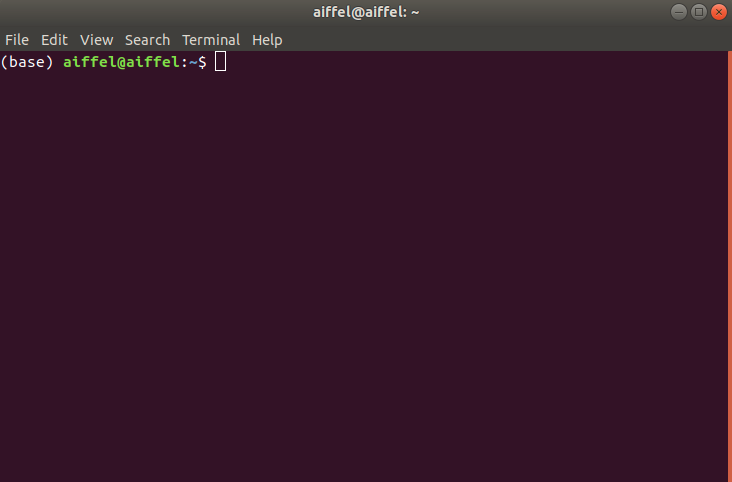</center>

라인 가장 왼쪽에 `(base)` 라는 글자가 생겼을 것이다. 바로 가상환경의 이름이다. 
아직 가상환경을 연결하지 않았기 때문에 기본이라는 뜻의 `(base)`라는 글자가 나온다. 

이제 가상환경을 사용할 준비가 되었다. 가상환경을 연결해보자.

### 가상환경 (aiffel) 구성
---
`Anaconda`가 정상적으로 설치되었다면 터미널을 다시 열어 다음과 같이 입력해보자.

```
$ conda activate aiffel
```

위 명령이 정상적으로 수행된다면 아래와 같이 가상환경 이름 부분이 `(aiffel)`로 변경된다.

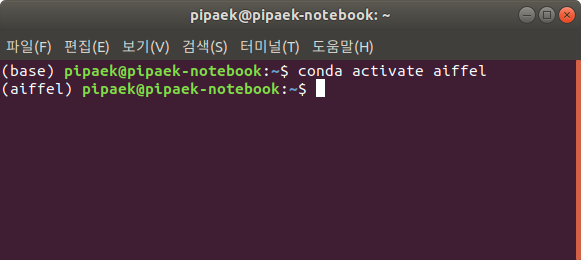

이번에는 가상환경을 생성하면서 나머지 필요한 모든 설치 및 환경설정을 한번에 해보자.

아래 두가지 경우 중 어느 쪽에 해당하는지에 따라 선택해서 터미널에서 실행하면 된다.

__1) NVIDIA GPU가 장착되지 않았다면 (tensorflow 설치)__

```
$ conda create -n aiffel python=3.7 -y && conda activate aiffel && conda install -c conda-forge anaconda notebook matplotlib tensorflow pandas seaborn cmake -y && python -m ipykernel install --user --name aiffel --display-name "aiffel" && echo "export TF_FORCE_GPU_ALLOW_GROWTH=true" >> ~/.bashrc && exit
```

__2) NVIDIA GPU가 장착된 컴퓨터라면 (tensorflow-gpu 설치)__
```
$ nvidia-smi
```
<br>

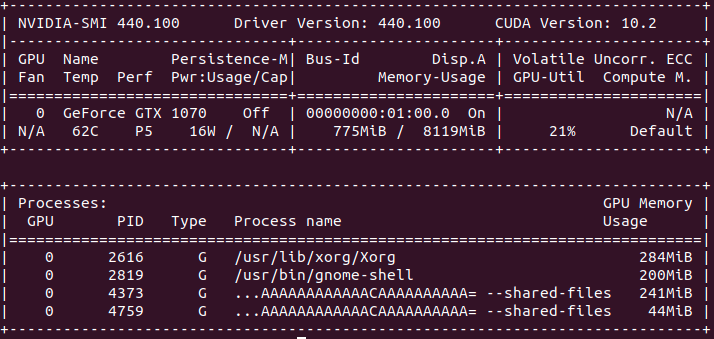

실행결과 위와 같은 화면이 나왔다면 다음과 같이 터미널에서 실행해보자.

```
$ conda create -n aiffel python=3.7 -y && conda activate aiffel && conda install -c conda-forge anaconda notebook matplotlib tensorflow-gpu pandas seaborn cmake -y && python -m ipykernel install --user --name aiffel --display-name "aiffel" && echo "export TF_FORCE_GPU_ALLOW_GROWTH=true" >> ~/.bashrc && exit
```

`nvidia-smi`의 결과화면이 보이지 않는다면 우선 GPU가 있는지 확인해보자.

```
$ lspci -k | grep VGA | grep NVIDIA
```

장착된 NVIDIA GPU가 있다면 뭔가 결과가 출력될 것이다. 만약 아무것도 출력되지 않는다면… 위로 올라가 NVIDIA GPU가 없을때의 환경구성을 실행하면 된다.

GPU를 확인했다면 터미널에서 다음과 같이 NVIDIA GPU 드라이버를 설치해보자.

> *(주의) 아래를 실행하게 되면 마지막엔 시스템을 리부팅하게 된다. 혹시 미리 저장해야 할 것이 있다면 잊지 말고 저장해 두자.*

```
$ sudo add-apt-repository ppa:graphics-drivers/ppa
$ sudo apt-get update -y && sudo apt-get install nvidia-driver-440 -y && sudo reboot
```

리부팅 후 `nvidia-smi`의 결과화면이 정상적으로 보인다면 위에 안내한 대로 `conda create ....` 부분을 실행하자.
